In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [2]:
!pip install catboost
from catboost import CatBoostRegressor

# Regression

## Model with noisy samples

In [3]:
data = pd.read_excel("/content/Data with noisy samples.xlsx")

In [4]:
data['ad_company_ad'] = data['ad_company_ad'].astype('object')
data['ad_protection_entitlement'] = data['ad_protection_entitlement'].astype('object')
data['ad_projectid'] = data['ad_projectid'].astype('object')
data['ad_contain_videos'] = data['ad_contain_videos'].astype('object')

In [5]:
data['ad_price'] = data['ad_price']/1e6

In [6]:
df1 = data.copy()

In [7]:
# Separate the features (X) and the target (y)
X = df1.drop(columns=['ad_price'])
y = df1['ad_price']

# Split the data into a test subset (smaller portion) and a training subset (larger portion)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
numerical_columns = X.select_dtypes(exclude = 'object').columns
categorical_columns = X_train.select_dtypes(include = 'object').columns
categorical_column_indices = [X_train.columns.get_loc(col) for col in categorical_columns]

In [9]:
# Convert NaN values to strings in the specified categorical columns
for col_index in categorical_column_indices:
    X_train.iloc[:, col_index] = X_train.iloc[:, col_index].astype(str).fillna('NaN')
    X_test.iloc[:, col_index] = X_test.iloc[:, col_index].astype(str).fillna('NaN')

In [10]:
# Initialize an empty dataframe to store results
results_df = pd.DataFrame(columns=['Model', 'MSE', 'R2_Score'])

# Additional regressors for models_with_categorical
models_with_categorical = [
    DecisionTreeRegressor(),
    RandomForestRegressor(max_depth=7, random_state=42),
    GradientBoostingRegressor(),
    XGBRegressor(learning_rate=0.2, max_depth=5, random_state=42),
    SVR(),
    CatBoostRegressor(iterations=1000,  # Specify the number of boosting iterations
                      learning_rate=0.1,  # Learning rate
                      depth = 7,
                      verbose=100,  # Print progress every 100 iterations
                      random_seed=42,
                      cat_features=categorical_column_indices)
]

# Additional regressors for models_without_categorical
models_without_categorical = [
    LinearRegression(),
    Ridge(alpha = 2),
    Lasso(),
    KNeighborsRegressor()
]

In [11]:
for model in models_without_categorical:
        # Fit the model
        model.fit(X_train[numerical_columns].fillna(X[numerical_columns].mean()), y_train)

        # Predict on the test set
        y_pred = model.predict(X_test[numerical_columns].fillna(X[numerical_columns].mean()))

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Append results to the dataframe
        results_df = results_df.append({'Model': type(model).__name__,
                                        'MSE': mse,
                                        'R2_Score': r2},
                                       ignore_index=True)

<ipython-input-11-2ed0ce384d00>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-11-2ed0ce384d00>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-11-2ed0ce384d00>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-11-2ed0ce384d00>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,


In [12]:
# Encode input
X_encoded = X.copy()
for feature in categorical_columns:
  label_encoder = LabelEncoder()
  X_encoded[feature] = label_encoder.fit_transform(X_encoded[feature])

X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

for model in models_with_categorical:
        # Fit the model
        model.fit(X_train_encoded.fillna(X_encoded.mean()), y_train)

        # Predict on the test set
        y_pred = model.predict(X_test_encoded.fillna(X_encoded.mean()))

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Append results to the dataframe
        results_df = results_df.append({'Model': type(model).__name__,
                                        'MSE': mse,
                                        'R2_Score': r2},
                                       ignore_index=True)

<ipython-input-12-ca2caa6a49ea>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-12-ca2caa6a49ea>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-12-ca2caa6a49ea>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-12-ca2caa6a49ea>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-12-ca2caa6a49ea>:21: FutureWarning: The frame.app

0:	learn: 10476.5192795	total: 118ms	remaining: 1m 57s
100:	learn: 5676.6054516	total: 6.09s	remaining: 54.2s
200:	learn: 2956.0673350	total: 12.5s	remaining: 49.7s
300:	learn: 1876.0993394	total: 16.2s	remaining: 37.7s
400:	learn: 1458.8494331	total: 18.7s	remaining: 27.9s
500:	learn: 1214.3115511	total: 22.7s	remaining: 22.6s
600:	learn: 1093.8398240	total: 26.3s	remaining: 17.5s
700:	learn: 960.1633463	total: 28.8s	remaining: 12.3s
800:	learn: 894.9294355	total: 31.3s	remaining: 7.78s
900:	learn: 823.4941993	total: 33.8s	remaining: 3.71s
999:	learn: 768.5551333	total: 37.7s	remaining: 0us


<ipython-input-12-ca2caa6a49ea>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,


In [13]:
# Display the results dataframe
results_df

,Model,MSE,R2_Score
0,LinearRegression,2.837706e+07,0.145286
1,Ridge,2.837646e+07,0.145304
2,Lasso,2.837599e+07,0.145318
3,KNeighborsRegressor,4.065833e+07,-0.224624
4,DecisionTreeRegressor,2.600304e+07,0.216791
5,RandomForestRegressor,2.773615e+07,0.164590
6,GradientBoostingRegressor,2.386885e+07,0.281073
7,XGBRegressor,2.323104e+07,0.300283
8,SVR,3.374690e+07,-0.016453
9,CatBoostRegressor,2.384278e+07,0.281858


## Model without noisy samples

In [14]:
df2 = pd.read_csv("/content/Data without noisy samples.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8070 entries, 0 to 8069
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               8070 non-null   int64  
 1   ad_list_id                               8070 non-null   int64  
 2   ad_price                                 8070 non-null   float64
 3   ad_rooms                                 8070 non-null   int64  
 4   ad_size                                  8070 non-null   float64
 5   ad_floornumber                           8070 non-null   float64
 6   ad_longitude                             8070 non-null   float64
 7   ad_latitude                              8070 non-null   float64
 8   ad_params_apartment_feature_value        8070 non-null   object 
 9   ad_params_apartment_type_value           8070 non-null   object 
 10  ad_params_balconydirection_value         8070 no

In [15]:
df2.drop(columns=["Unnamed: 0", 'ad_list_id'], inplace=True)

In [16]:
df2['ad_price'] = df2['ad_price']/1e6

In [17]:
# Separate the features (X) and the target (y)
X = df2.drop(columns=['ad_price'])
y = df2['ad_price']

# Split the data into a test subset (smaller portion) and a training subset (larger portion)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
numerical_columns = X.select_dtypes(exclude = 'object').columns
categorical_columns = X_train.select_dtypes(include = 'object').columns
categorical_column_indices = [X_train.columns.get_loc(col) for col in categorical_columns]

In [19]:
# Convert NaN values to strings in the specified categorical columns
for col_index in categorical_column_indices:
    X_train.iloc[:, col_index] = X_train.iloc[:, col_index].astype(str).fillna('NaN')
    X_test.iloc[:, col_index] = X_test.iloc[:, col_index].astype(str).fillna('NaN')

In [20]:
# Initialize an empty dataframe to store results
results_df = pd.DataFrame(columns=['Model', 'MSE', 'R2_Score'])

# Additional regressors for models_with_categorical
models_with_categorical = [
    DecisionTreeRegressor(),
    RandomForestRegressor(max_depth=7, random_state=42),
    GradientBoostingRegressor(),
    XGBRegressor(learning_rate=0.2, max_depth=5, random_state=42),
    SVR(),
    CatBoostRegressor(iterations=1000,  # Specify the number of boosting iterations
                      learning_rate=0.1,  # Learning rate
                      depth = 7,
                      verbose=100,  # Print progress every 100 iterations
                      random_seed=42,
                      cat_features=categorical_column_indices)
]

# Additional regressors for models_without_categorical
models_without_categorical = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    KNeighborsRegressor()
]

In [21]:
for model in models_without_categorical:
        # Fit the model
        model.fit(X_train[numerical_columns].fillna(X[numerical_columns].mean()), y_train)

        # Predict on the test set
        y_pred = model.predict(X_test[numerical_columns].fillna(X[numerical_columns].mean()))

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Append results to the dataframe
        results_df = results_df.append({'Model': type(model).__name__,
                                        'MSE': mse,
                                        'R2_Score': r2},
                                       ignore_index=True)

<ipython-input-21-2ed0ce384d00>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-21-2ed0ce384d00>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-21-2ed0ce384d00>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-21-2ed0ce384d00>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,


In [22]:
# Encode input
X_encoded = X.copy()
for feature in categorical_columns:
  label_encoder = LabelEncoder()
  X_encoded[feature] = label_encoder.fit_transform(X_encoded[feature])

X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

for model in models_with_categorical:
        # Fit the model
        model.fit(X_train_encoded.fillna(X_encoded.mean()), y_train)

        # Predict on the test set
        y_pred = model.predict(X_test_encoded.fillna(X_encoded.mean()))

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Append results to the dataframe
        results_df = results_df.append({'Model': type(model).__name__,
                                        'MSE': mse,
                                        'R2_Score': r2},
                                       ignore_index=True)

<ipython-input-22-ca2caa6a49ea>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-22-ca2caa6a49ea>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-22-ca2caa6a49ea>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-22-ca2caa6a49ea>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-22-ca2caa6a49ea>:21: FutureWarning: The frame.app

0:	learn: 1011.5071991	total: 34.2ms	remaining: 34.2s
100:	learn: 647.1104768	total: 1.95s	remaining: 17.3s
200:	learn: 580.1304837	total: 4.78s	remaining: 19s
300:	learn: 541.1477024	total: 7.07s	remaining: 16.4s
400:	learn: 515.7909820	total: 8.36s	remaining: 12.5s
500:	learn: 491.9502202	total: 9.65s	remaining: 9.61s
600:	learn: 469.8406531	total: 11s	remaining: 7.29s
700:	learn: 450.5345948	total: 12.3s	remaining: 5.25s
800:	learn: 434.3949814	total: 13.6s	remaining: 3.39s
900:	learn: 417.2492435	total: 15s	remaining: 1.65s
999:	learn: 402.8538682	total: 16.3s	remaining: 0us


<ipython-input-22-ca2caa6a49ea>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,


In [23]:
# Display the results dataframe
results_df

,Model,MSE,R2_Score
0,LinearRegression,7.547920e+05,0.316503
1,Ridge,7.549477e+05,0.316362
2,Lasso,7.562183e+05,0.315212
3,KNeighborsRegressor,8.592289e+05,0.221931
4,DecisionTreeRegressor,7.175236e+05,0.350251
5,RandomForestRegressor,5.123438e+05,0.536051
6,GradientBoostingRegressor,5.038811e+05,0.543714
7,XGBRegressor,4.015732e+05,0.636358
8,SVR,1.032810e+06,0.064746
9,CatBoostRegressor,3.736828e+05,0.661614


In [24]:
model = CatBoostRegressor(iterations=1000,  # Specify the number of boosting iterations
                          learning_rate=0.1,  # Learning rate
                          depth = 8,
                          verbose=100,  # Print progress every 100 iterations
                          random_seed=42,
                          cat_features=categorical_column_indices)

model.fit(X_train, y_train)

0:	learn: 1009.0937461	total: 23.1ms	remaining: 23s
100:	learn: 627.8179233	total: 3.85s	remaining: 34.3s
200:	learn: 550.9854048	total: 6.73s	remaining: 26.8s
300:	learn: 509.2550697	total: 8.63s	remaining: 20.1s
400:	learn: 469.4802093	total: 10.6s	remaining: 15.8s
500:	learn: 437.5293502	total: 12.6s	remaining: 12.6s
600:	learn: 409.5668842	total: 14.6s	remaining: 9.68s
700:	learn: 385.2425753	total: 17.6s	remaining: 7.5s
800:	learn: 364.6206423	total: 21.3s	remaining: 5.3s
900:	learn: 346.6091419	total: 23.3s	remaining: 2.56s
999:	learn: 328.6806683	total: 25.3s	remaining: 0us


In [25]:
y_pred = model.predict(X_test)

r2_score(y_test, y_pred)

0.6580297716087837

Top 10 Most Important Features:
ad_size: 22.57371131572302
ad_latitude: 21.001757991234218
ad_longitude: 19.746700435754814
ad_area_name: 11.374525450396023
ad_params_direction_value: 4.120348469246567
ad_params_balconydirection_value: 3.9679990799937364
ad_params_furnishing_sell_value: 3.661227825012887
ad_floornumber: 3.2586819992724845
ad_params_property_legal_document_value: 3.164986156807651
ad_rooms: 2.34774828509995


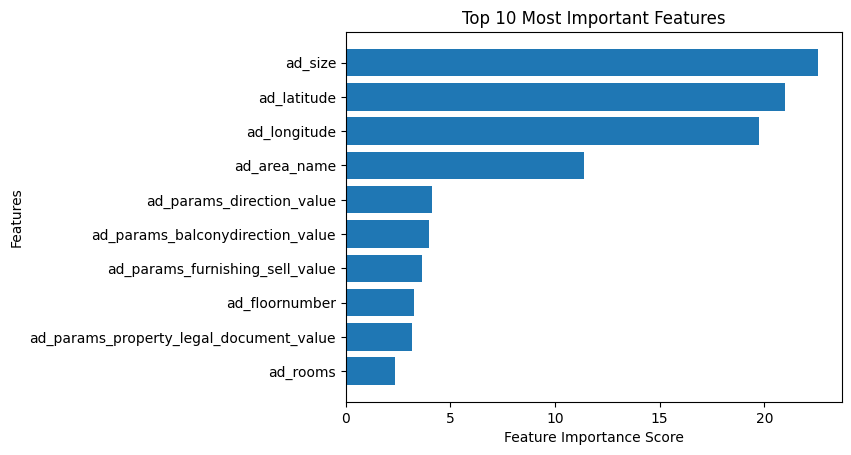

In [26]:
# Get feature importances
feature_importance = model.get_feature_importance()

# Get feature names
feature_names = X_train.columns  # Replace with the actual column names of your features

# Create a dictionary to store feature names and their corresponding importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort feature importances and select the top 10
top_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 most important features
print("Top 10 Most Important Features:")
for feature, importance in top_features:
    print(f"{feature}: {importance}")

# Plot only the top 10 feature importances in descending order
top_feature_names, top_feature_importance = zip(*top_features)

plt.barh(top_feature_names[::-1], top_feature_importance[::-1])  # Reverse the order for descending plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features')
plt.show()

## Randomly select 4000, 5000, 6000 samples from the dataset

### 2000 samples

In [27]:
def training(df):

    # Separate the features (X) and the target (y)
    X = df.drop(columns=['ad_price'])
    y = df['ad_price']

    # Split the data into a test subset (smaller portion) and a training subset (larger portion)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    numerical_columns = X.select_dtypes(exclude = 'object').columns
    categorical_columns = X_train.select_dtypes(include = 'object').columns
    categorical_column_indices = [X_train.columns.get_loc(col) for col in categorical_columns]

    # Convert NaN values to strings in the specified categorical columns
    for col_index in categorical_column_indices:
        X_train.iloc[:, col_index] = X_train.iloc[:, col_index].astype(str).fillna('NaN')
        X_test.iloc[:, col_index] = X_test.iloc[:, col_index].astype(str).fillna('NaN')

    # Initialize an empty dataframe to store results
    results_df = pd.DataFrame(columns=['Model', 'MSE', 'R2_Score'])

    # Additional regressors for models_with_categorical
    models_with_categorical = [
        DecisionTreeRegressor(),
        RandomForestRegressor(max_depth=7, random_state=42),
        GradientBoostingRegressor(),
        XGBRegressor(learning_rate=0.2, max_depth=5, random_state=42),
        SVR(),
        CatBoostRegressor(iterations=1000,  # Specify the number of boosting iterations
                          learning_rate=0.1,  # Learning rate
                          depth = 7,
                          verbose=100,  # Print progress every 100 iterations
                          random_seed=42,
                          cat_features=categorical_column_indices)
    ]

    # Additional regressors for models_without_categorical
    models_without_categorical = [
        LinearRegression(),
        Ridge(),
        Lasso(),
        KNeighborsRegressor()
    ]
    for model in models_without_categorical:
            # Fit the model
            model.fit(X_train[numerical_columns].fillna(X[numerical_columns].mean()), y_train)

            # Predict on the test set
            y_pred = model.predict(X_test[numerical_columns].fillna(X[numerical_columns].mean()))

            # Calculate metrics
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # Append results to the dataframe
            results_df = results_df.append({'Model': type(model).__name__,
                                            'MSE': mse,
                                            'R2_Score': r2},
                                          ignore_index=True)
    # Encode input
    X_encoded = X.copy()
    for feature in categorical_columns:
      label_encoder = LabelEncoder()
      X_encoded[feature] = label_encoder.fit_transform(X_encoded[feature])

    X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    for model in models_with_categorical:
            # Fit the model
            model.fit(X_train_encoded.fillna(X_encoded.mean()), y_train)

            # Predict on the test set
            y_pred = model.predict(X_test_encoded.fillna(X_encoded.mean()))

            # Calculate metrics
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # Append results to the dataframe
            results_df = results_df.append({'Model': type(model).__name__,
                                            'MSE': mse,
                                            'R2_Score': r2},
                                          ignore_index=True)
    # Display the results dataframe
    print(results_df)

In [28]:
df_2000 = df2.sample(2000)

In [29]:
training(df_2000)

<ipython-input-27-e4fd8e2ebc6e>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-27-e4fd8e2ebc6e>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-27-e4fd8e2ebc6e>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-27-e4fd8e2ebc6e>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-27-e4fd8e2ebc6e>:79: FutureWarning: The frame.app

0:	learn: 1054.3493501	total: 7.42ms	remaining: 7.41s
100:	learn: 650.2168650	total: 683ms	remaining: 6.08s
200:	learn: 521.9308261	total: 1.41s	remaining: 5.62s
300:	learn: 445.7968256	total: 2.71s	remaining: 6.3s
400:	learn: 390.1589799	total: 3.98s	remaining: 5.95s
500:	learn: 337.3382625	total: 5.47s	remaining: 5.45s
600:	learn: 295.0404591	total: 6.98s	remaining: 4.63s
700:	learn: 263.0338396	total: 8.48s	remaining: 3.62s
800:	learn: 234.6475982	total: 9.66s	remaining: 2.4s
900:	learn: 211.1585192	total: 10.4s	remaining: 1.14s
999:	learn: 191.3086034	total: 11.1s	remaining: 0us
                       Model            MSE  R2_Score
0           LinearRegression  711453.722256  0.269966
1                      Ridge  709704.316045  0.271761
2                      Lasso  709474.258025  0.271997
3        KNeighborsRegressor  859936.325222  0.117605
4      DecisionTreeRegressor  951103.678772  0.024057
5      RandomForestRegressor  515886.171554  0.470641
6  GradientBoostingRegressor  53

<ipython-input-27-e4fd8e2ebc6e>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,


### 5000 samples

In [39]:
df_5000 = df2.sample(5000)

In [40]:
training(df_5000)

<ipython-input-27-e4fd8e2ebc6e>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-27-e4fd8e2ebc6e>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-27-e4fd8e2ebc6e>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-27-e4fd8e2ebc6e>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-27-e4fd8e2ebc6e>:79: FutureWarning: The frame.app

0:	learn: 1014.0525843	total: 11ms	remaining: 11s
100:	learn: 655.3844127	total: 1.01s	remaining: 9.02s
200:	learn: 567.9251489	total: 2.04s	remaining: 8.11s
300:	learn: 516.8454008	total: 3.06s	remaining: 7.12s
400:	learn: 473.9163468	total: 4.1s	remaining: 6.13s
500:	learn: 441.7976106	total: 5.12s	remaining: 5.1s
600:	learn: 413.3656886	total: 6.17s	remaining: 4.1s
700:	learn: 387.6542399	total: 7.23s	remaining: 3.08s
800:	learn: 366.7597201	total: 8.27s	remaining: 2.06s
900:	learn: 345.5297540	total: 10.2s	remaining: 1.12s
999:	learn: 323.5407586	total: 12.4s	remaining: 0us
                       Model           MSE  R2_Score
0           LinearRegression  7.416869e+05  0.323632
1                      Ridge  7.418398e+05  0.323493
2                      Lasso  7.426018e+05  0.322798
3        KNeighborsRegressor  8.190078e+05  0.253121
4      DecisionTreeRegressor  7.787526e+05  0.289831
5      RandomForestRegressor  5.234207e+05  0.522676
6  GradientBoostingRegressor  5.088869e+05  

<ipython-input-27-e4fd8e2ebc6e>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,


### 8000 samples

In [41]:
df_8000 = df2.sample(8000)

In [42]:
training(df_8000)

<ipython-input-27-e4fd8e2ebc6e>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-27-e4fd8e2ebc6e>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-27-e4fd8e2ebc6e>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-27-e4fd8e2ebc6e>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
<ipython-input-27-e4fd8e2ebc6e>:79: FutureWarning: The frame.app

0:	learn: 1012.7150076	total: 15.4ms	remaining: 15.4s
100:	learn: 654.8102463	total: 1.32s	remaining: 11.8s
200:	learn: 584.2190583	total: 2.66s	remaining: 10.6s
300:	learn: 542.2594004	total: 3.98s	remaining: 9.24s
400:	learn: 514.1089060	total: 5.36s	remaining: 8s
500:	learn: 484.5832452	total: 8.15s	remaining: 8.12s
600:	learn: 461.2790499	total: 10.8s	remaining: 7.2s
700:	learn: 439.1786968	total: 12.2s	remaining: 5.2s
800:	learn: 421.0182732	total: 13.6s	remaining: 3.37s
900:	learn: 405.6960019	total: 14.9s	remaining: 1.64s
999:	learn: 389.1685654	total: 16.2s	remaining: 0us
                       Model            MSE  R2_Score
0           LinearRegression  702656.306855  0.340453
1                      Ridge  702685.675899  0.340425
2                      Lasso  703387.819323  0.339766
3        KNeighborsRegressor  755787.792379  0.290581
4      DecisionTreeRegressor  749465.939165  0.296515
5      RandomForestRegressor  487597.820999  0.542317
6  GradientBoostingRegressor  48384

<ipython-input-27-e4fd8e2ebc6e>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': type(model).__name__,
